In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [25]:
# Define the transformation to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [26]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [27]:

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [28]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [29]:
# Set the batch size for training and testing
batch_size = 64

In [30]:
# Create an instance of the neural network
model = NeuralNetwork()

In [31]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
# Lists to store the loss and accuracy values
loss_history = []
accuracy_history = []

In [33]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(images)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

        # Calculate the total and correct predictions
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Calculate the average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions * 100
    loss_history.append(epoch_loss)
    accuracy_history.append(epoch_accuracy)

    # Print the epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch [1/10], Loss: 0.3977, Accuracy: 88.06%
Epoch [2/10], Loss: 0.1913, Accuracy: 94.20%
Epoch [3/10], Loss: 0.1339, Accuracy: 95.96%
Epoch [4/10], Loss: 0.1073, Accuracy: 96.67%
Epoch [5/10], Loss: 0.0923, Accuracy: 97.05%
Epoch [6/10], Loss: 0.0771, Accuracy: 97.57%
Epoch [7/10], Loss: 0.0725, Accuracy: 97.70%
Epoch [8/10], Loss: 0.0645, Accuracy: 97.93%
Epoch [9/10], Loss: 0.0584, Accuracy: 98.15%
Epoch [10/10], Loss: 0.0534, Accuracy: 98.27%


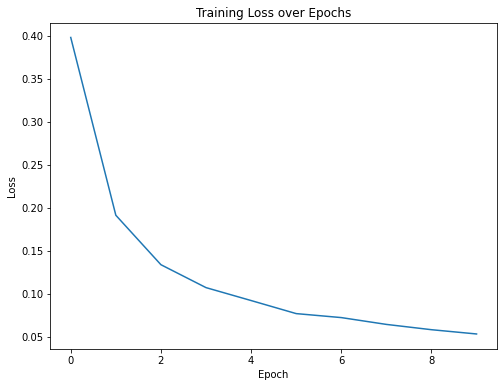

In [35]:
# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

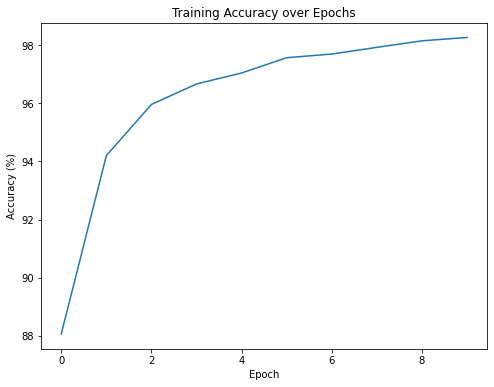

In [36]:
# Plot the accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(accuracy_history)
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy over Epochs")
plt.show()